In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

In [2]:
%matplotlib inline

In [3]:
""" KH """

' KH '

In [ ]:
fs_IS = []
fs_ISCE = []
fs_BDNK = []
#files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
#for f in files:
for n in range(11):
    fs_IS.append(h5py.File(f'IS/KH/Ideal/cfl04/dp_400x400x0_{n}.hdf5', 'r'))
    fs_ISCE.append(h5py.File(f'ISCE/KH/Shear/Ideal/cfl04/dp_400x400x0_{n}.hdf5', 'r'))
    fs_BDNK.append(h5py.File(f'BDNK/KH/Shear/Ideal/cfl04/dp_800x800x0_{n}.hdf5', 'r'))

In [4]:
""" Shocktube 1D """

' Shocktube 1D '

In [75]:
""" NON-IDEAL """

' NON-IDEAL '

In [22]:
fs_IS = []
fs_ISCE = []
fs_BDNK = []
#files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
#for f in files:
for n in range(6):
#     fs_IS.append(h5py.File(f'IS/Shocktube1D/Ideal/smol/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_ISCE.append(h5py.File(f'ISCE/Shocktube1D/Ideal/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_IS.append(h5py.File(f'IS/Shocktube1D/Bulk/zeta1em2/data_serial_TIx_{n}.hdf5', 'r'))
    fs_IS.append(h5py.File(f'IS/Shocktube1D/Bulk/zeta1em3/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE.append(h5py.File(f'ISCE/Shocktube1D/Bulk/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_IS.append(h5py.File(f'IS/Shocktube1D/Heat/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_ISCE.append(h5py.File(f'ISCE/Shocktube1D/Heat/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_IS.append(h5py.File(f'IS/Shocktube1D/Shear/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_ISCE.append(h5py.File(f'ISCE/Shocktube1D/Shear/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_BDNK.append(h5py.File(f'BDNK/Shocktube1D/Ideal/data_serial_{n}.hdf5', 'r'))
    fs_BDNK.append(h5py.File(f'BDNK/Shocktube1D/Bulk/zeta1em3/data_serial_TIx_{n}.hdf5', 'r'))
fss = [fs_IS, fs_ISCE, fs_BDNK]
# names = ['IS Ideal', 'ISCE Ideal', 'BDNK Ideal']
# names = ['IS Shear', 'ISCE Shear']#, 'BDNK Ideal']
names = ['IS Bulk', 'ISCE Bulk', 'BDNK Bulk']
linestyles = ['solid','dashed', 'dotted']#dashdot

In [178]:
for fs in fss:
    print(f"endtime: {fs[-1].attrs['t']}")
    print(f"Domain size: {fs[-1]['Domain/x']}")
    zeta = fs[0]['Optional'].attrs['zeta'][0]
    kappa = fs[0]['Optional'].attrs['kappa'][0]
    if fs == fs_BDNK:
        eta = fs[0]['Optional'].attrs['eta_0'][0]
    else:
        eta = fs[0]['Optional'].attrs['eta'][0]

    if fs != fs_BDNK:
        tau_Pi = fs[0]['Optional'].attrs['tau_Pi'][0]
        tau_q = fs[0]['Optional'].attrs['tau_q'][0]
        tau_pi = fs[0]['Optional'].attrs['tau_pi'][0]

    print(f"Dissipation strengths: zeta {zeta}, "
          f"kappa: {kappa}, ", f"eta: {eta}, "
      f"relaxation time {tau_pi}, "
      f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

endtime: [2.]
Domain size: <HDF5 dataset "x": shape (800,), type "<f8">
Dissipation strengths: zeta 0.001, kappa: 1e-15,  eta: 1e-15, relaxation time 0.1, timestep 0.0006250000000000001
endtime: [2.]
Domain size: <HDF5 dataset "x": shape (800,), type "<f8">
Dissipation strengths: zeta 0.001, kappa: 1e-15,  eta: 1e-15, relaxation time 0.1, timestep 0.0006250000000000001
endtime: [2.]
Domain size: <HDF5 dataset "x": shape (800,), type "<f8">


KeyError: "Can't open attribute (can't locate attribute: 'eta_0')"

In [74]:
""" IDEAL """

' IDEAL '

In [19]:
fs_IS_ID = []
fs_ISCE_ID = []
fs_BDNK_ID = []
#files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
#for f in files:
for n in range(6):
#     fs_IS_ID.append(h5py.File(f'IS/Shocktube1D/Ideal/smol/data_serial_TIx_{n}.hdf5', 'r'))
    fs_IS_ID.append(h5py.File(f'IS/Shocktube1D/Ideal/data_serial_TIx_{n}.hdf5', 'r'))

    fs_ISCE_ID.append(h5py.File(f'ISCE/Shocktube1D/Ideal/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_ISCE_ID.append(h5py.File(f'ISCE/Shocktube1D/Ideal/big1/data_serial_TIx_{n}.hdf5', 'r'))
    
    fs_BDNK_ID.append(h5py.File(f'BDNK/Shocktube1D/Ideal/data_serial_{n}.hdf5', 'r'))
fss_ID = [fs_IS_ID, fs_ISCE_ID, fs_BDNK_ID]
# names = ['IS Ideal', 'ISCE Ideal', 'BDNK Ideal']
# names = ['IS Bulk', 'ISCE Bulk', 'BDNK Bulk']
# linestyles = ['solid','dashed', 'dashdot']

In [195]:
for fs in fss_ID:
    print(f"endtime: {fs[-1].attrs['t']}")
    print(f"Domain size: {fs[-1]['Domain/x']}")
    zeta = fs[0]['Optional'].attrs['zeta'][0]
    kappa = fs[0]['Optional'].attrs['kappa'][0]
    if fs == fs_BDNK:
        eta = fs[0]['Optional'].attrs['eta_0'][0]
    else:
        eta = fs[0]['Optional'].attrs['eta'][0]

    if fs != fs_BDNK:
        tau_Pi = fs[0]['Optional'].attrs['tau_Pi'][0]
        tau_q = fs[0]['Optional'].attrs['tau_q'][0]
        tau_pi = fs[0]['Optional'].attrs['tau_pi'][0]

    print(f"Dissipation strengths: zeta {zeta}, "
          f"kappa: {kappa}, ", f"eta: {eta}, "
      f"relaxation time {tau_pi}, "
      f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

endtime: [2.]
Domain size: <HDF5 dataset "x": shape (800,), type "<f8">
Dissipation strengths: zeta 1e-15, kappa: 1e-15,  eta: 1e-15, relaxation time 0.1, timestep 0.0006250000000000001
endtime: [0.4]
Domain size: <HDF5 dataset "x": shape (300,), type "<f8">
Dissipation strengths: zeta 1e-15, kappa: 1e-15,  eta: 1e-15, relaxation time 0.1, timestep 0.0003333333333333334
endtime: [0.4]
Domain size: <HDF5 dataset "x": shape (400,), type "<f8">


KeyError: "Can't open attribute (can't locate attribute: 'eta')"

In [26]:
nslice=fs_IS[0]['Domain'].attrs['nx'][0]//2
print(nslice)

400


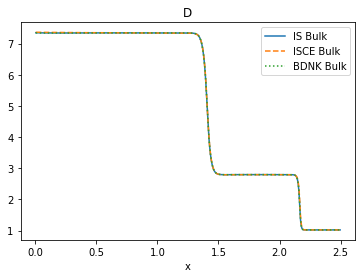

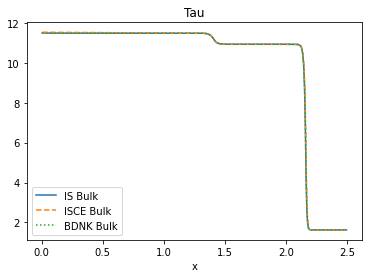

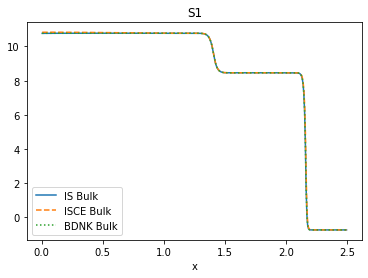

In [27]:

for quant in['D','Tau','S1']:
    plt.figure()
    for fs, name, ls in zip(fss, names, linestyles):
        plt.plot(fs[-1]['Domain/x'][:nslice], fs[-1]['Conserved/'+quant][:nslice],label=name,linestyle=ls)
    plt.title(quant)
    plt.xlabel('x')
    plt.legend()
#     plt.savefig("ConfirmationReportPlots/ConsIdeal_"+quant+".pdf")
#     plt.savefig("ConfirmationReportPlots/Shocktube/ConsBulk_"+quant+".pdf")
    plt.show()


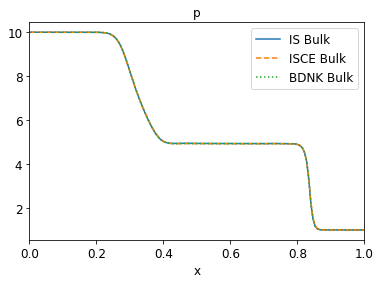

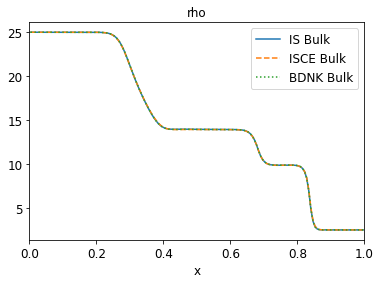

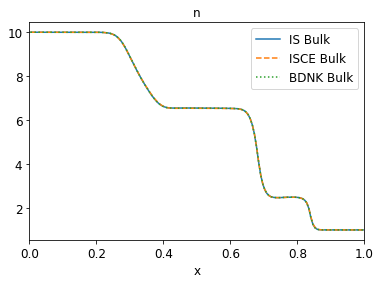

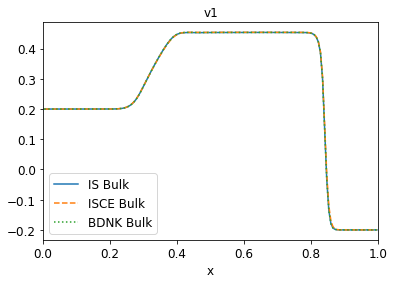

In [84]:
for quant in['p','rho','n','v1']:
    plt.figure()
    for fs, name, ls in zip(fss, names, linestyles):
        plt.plot(fs[1]['Domain/x'][:nslice], fs[1]['Primitive/'+quant][:nslice],label=name,linestyle=ls)
    plt.title(quant)
    plt.xlabel('x')
    plt.xlim(0,1.0)
    plt.legend()
#     plt.savefig("ConfirmationReportPlots/PrimsIdeal_"+quant+".pdf")
#     plt.savefig("ConfirmationReportPlots/Shocktube/PrimsBulk_"+quant+".pdf")
    plt.show()

In [47]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

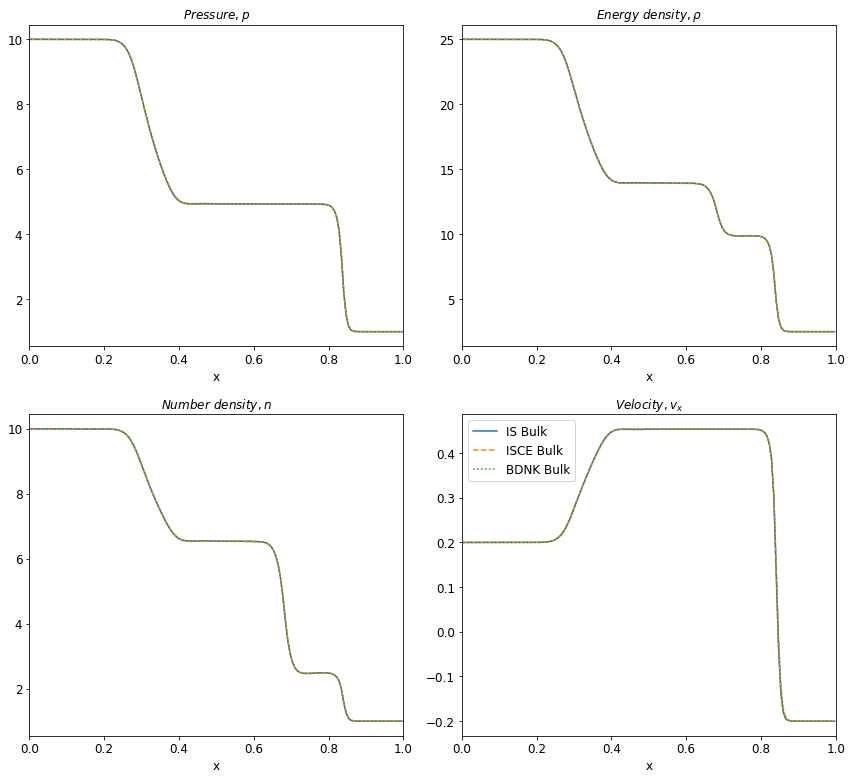

In [59]:
fig, axes = plt.subplots(2,2,figsize=(12,11))
axes = axes.flatten()
var_names = [r'$Pressure, p$',r'$Energy~density, \rho$',r'$Number~density, n$',r'$Velocity, v_x$']
for quant, count, var_name in zip(['p','rho','n','v1'],[0,1,2,3],var_names):
    for fs, name, ls in zip(fss, names, linestyles):
        axes[count].plot(fs[1]['Domain/x'][:nslice], fs[1]['Primitive/'+quant][:nslice],label=name,linestyle=ls)
        axes[count].set_xlabel('x')
        axes[count].set_xlim(0,1.0)
        axes[count].set_title(var_name)  
#         plt.subplot(112, sharex=ax1)
plt.legend()
#     plt.savefig("ConfirmationReportPlots/PrimsIdeal_"+quant+".pdf")
fig.tight_layout()
plt.savefig("ConfirmationReportPlots/Shocktube/PrimsBulk_all.pdf")
plt.show()


In [30]:
nslice=fs_IS[0]['Domain'].attrs['nx'][0]//5
print(nslice)

160


No handles with labels found to put in legend.


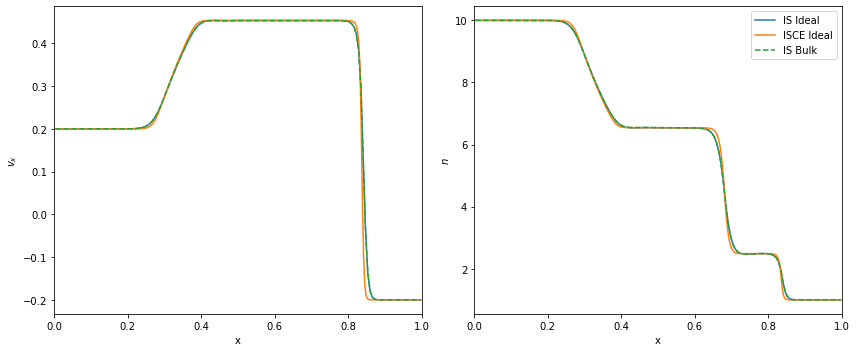

In [33]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes = axes.flatten()
var_names = [r'$v_x$',r'$n$']
for quant, var_num, var_name in zip(['v1','n'],[0,1],var_names):
    axes[var_num].plot(fs_IS_ID[-1]['Domain/x'][:nslice], fs_IS_ID[1]['Primitive/'+quant][:nslice],label='IS Ideal',linestyle='solid')
    axes[var_num].plot(fs_ISCE_ID[-1]['Domain/x'][:2*nslice], fs_ISCE_ID[-1]['Primitive/'+quant][:2*nslice],label='ISCE Ideal',linestyle='solid')

    axes[var_num].plot(fs_IS[-1]['Domain/x'][:nslice], fs_IS[1]['Primitive/'+quant][:nslice],label='IS Bulk',linestyle='dashed')
#     axes[var_num].plot(fs_ISCE[-1]['Domain/x'][:nslice], fs_ISCE[1]['Primitive/'+quant][:nslice],label='ISCE Bulk',linestyle='dashed')
    axes[var_num].set_xlabel('x')
    axes[var_num].set_xlim(0,1.0)
    axes[var_num].set_ylabel(var_name)
#     cax = fig.add_axes([axes.flatten()[-1].get_position().x1+0.01,axes.flatten()[-1].get_position().y0,0.02,axes.flatten()[-1].get_position().height])
    # plt.title(quant)
    plt.legend()
fig.tight_layout()
# plt.savefig("ConfirmationReportPlots/Shocktube/Prims_ISCE_IdVsBulk_nv1.pdf")
plt.show()

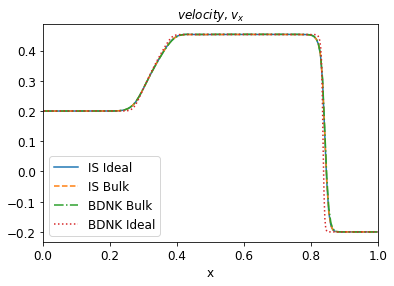

In [81]:
quant='v1'
plt.plot(fs_IS_ID[-1]['Domain/x'][:nslice], fs_IS_ID[1]['Primitive/'+quant][:nslice],label='IS Ideal',linestyle='solid')
plt.plot(fs_IS[-1]['Domain/x'][:nslice], fs_IS[1]['Primitive/'+quant][:nslice],label='IS Bulk',linestyle='dashed')
# plt.plot(fs_ISCE_ID[-1]['Domain/x'][:2*nslice], fs_ISCE_ID[-1]['Primitive/'+quant][:2*nslice],label='ISCE Ideal',linestyle='dotted')
# plt.plot(fs_ISCE[-1]['Domain/x'][:nslice], fs_ISCE[1]['Primitive/'+quant][:nslice],label='ISCE Bulk',linestyle='dashdot')
plt.plot(fs_BDNK_ID[-1]['Domain/x'][:int(2.5*nslice)], fs_BDNK_ID[-1]['Primitive/'+quant][:int(2.5*nslice)],label='BDNK Ideal',linestyle='dotted')
plt.plot(fs_BDNK[-1]['Domain/x'][:int(0.5*nslice)], fs_BDNK[-1]['Primitive/'+quant][:int(0.5*nslice)],label='BDNK Bulk',linestyle='dashdot')
plt.title(r'$velocity, v_x$')
# plt.title(r'$number~density, n$')
# plt.set_ylim(0.7,1.7)
plt.xlim(0.0,1.0)
plt.xlabel('x')
plt.legend()
# plt.savefig("ConfirmationReportPlots/Shocktube/Prims_ISBDNK_IdVsBulk_"+quant+".pdf")
plt.show()

<Figure size 432x288 with 0 Axes>

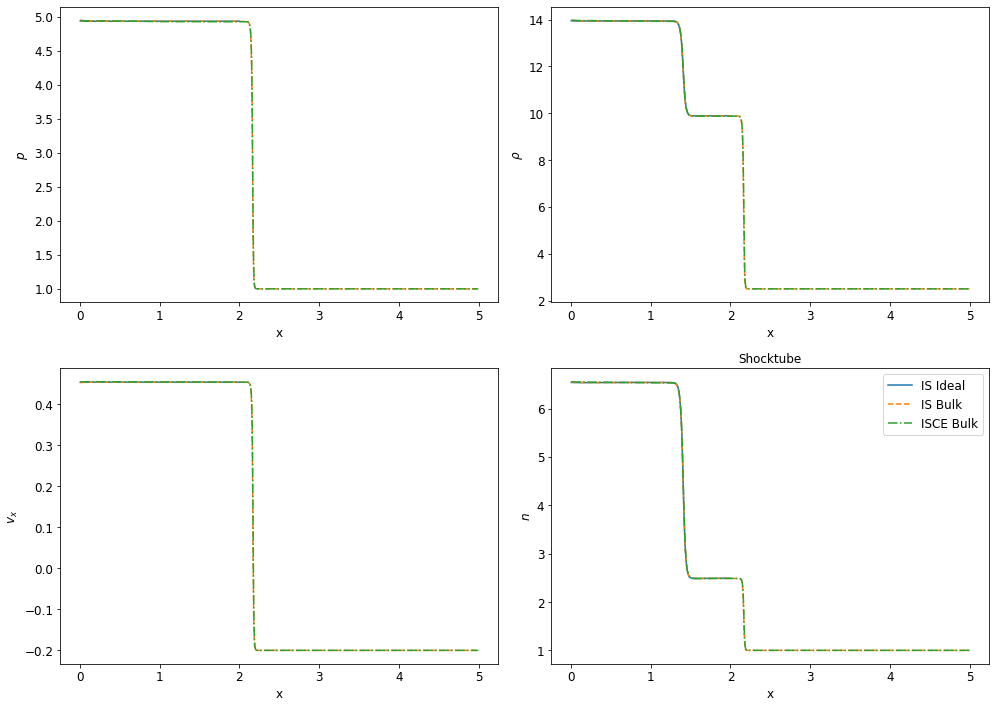

In [83]:
plt.figure()
fig, axes = plt.subplots(2,2,figsize=(14, 10))
axes = axes.flatten()
var_names = [r'$p$',r'$\rho$',r'$v_x$',r'$n$']
for quant, num, var_name in zip(['p','rho','v1','n'],[0,1,2,3],var_names):
    axes[num].plot(fs_IS_ID[-1]['Domain/x'][:2*nslice], fs_IS_ID[-1]['Primitive/'+quant][:2*nslice],label='IS Ideal',linestyle='solid')
#     axes[num].plot(fs_IS[2]['Domain/x'][:nslice], fs_IS[1]['Primitive/'+quant][:nslice],label='IS Bulk',linestyle='dashed')
    axes[num].plot(fs_IS[2]['Domain/x'][:25*nslice], fs_IS[-1]['Primitive/'+quant][:25*nslice],label='IS Bulk',linestyle='dashed')
#     axes[num].plot(fs_ISCE_ID[-1]['Domain/x'][:], fs_ISCE_ID[1]['Primitive/'+quant][:],label='ISCE Ideal',linestyle='dotted')
    axes[num].plot(fs_ISCE[-1]['Domain/x'][::], fs_ISCE[-1]['Primitive/'+quant][::],label='ISCE Bulk',linestyle='dashdot')

#     plt.title(quant)
    axes[num].set_xlabel('x')
    axes[num].set_ylabel(var_name)
plt.title('Shocktube')
fig.tight_layout()
plt.legend()
# plt.savefig("ConfirmationReportPlots/Shocktube/Prims_ISCE_IdVsBulk_"+quant+".pdf")
plt.show()    
    
    
#     plt.plot(fs_IS_ID[-1]['Domain/x'][:2*nslice], fs_IS_ID[-1]['Primitive/'+quant][:2*nslice],label='IS Ideal',linestyle='solid')
#     plt.plot(fs_IS[-1]['Domain/x'][:nslice], fs_IS[-1]['Primitive/'+quant][:nslice],label='IS Bulk',linestyle='dashed')
#     plt.plot(fs_BDNK_ID[-1]['Domain/x'][:int(2.5*nslice)], fs_BDNK_ID[-1]['Primitive/'+quant][:int(2.5*nslice)],label='BDNK Ideal',linestyle='dotted')
#     plt.plot(fs_BDNK[-1]['Domain/x'][:nslice], fs_BDNK[-1]['Primitive/'+quant][:nslice],label='BDNK Bulk',linestyle='dashdot')


In [198]:
""" STILLSHOCK """

' STILLSHOCK '

In [226]:
fs_IS = []
fs_ISCE = []
fs_BDNK = []
#files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
#for f in files:
for n in range(6):
#     fs_IS.append(h5py.File(f'IS/StillShock/ideal/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_ISCE.append(h5py.File(f'ISCE/StillShock/ideal/data_serial_TIx_{n}.hdf5', 'r'))
    fs_IS.append(h5py.File(f'IS/StillShock/bulk/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE.append(h5py.File(f'ISCE/StillShock/bulk/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_IS.append(h5py.File(f'IS/StillShock/heat_bulk/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_ISCE.append(h5py.File(f'ISCE/StillShock/heat_bulk/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_IS.append(h5py.File(f'IS/StillShock/heat/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_ISCE.append(h5py.File(f'ISCE/StillShock/heat/data_serial_TIx_{n}.hdf5', 'r'))

fss = [fs_IS, fs_ISCE]
# names = ['IS Ideal', 'ISCE Ideal', 'BDNK Ideal']
# names = ['IS Shear', 'ISCE Shear']#, 'BDNK Ideal']
names = ['IS Bulk', 'ISCE Bulk']
linestyles = ['solid','dashed']#dashdot

In [227]:
for fs in fss:
    print(f"endtime: {fs[-1].attrs['t']}")
    print(f"Domain size: {fs[-1]['Domain/x']}")
    zeta = fs[0]['Optional'].attrs['zeta'][0]
    kappa = fs[0]['Optional'].attrs['kappa'][0]
    if fs == fs_BDNK:
        eta = fs[0]['Optional'].attrs['eta_0'][0]
    else:
        eta = fs[0]['Optional'].attrs['eta'][0]

    if fs != fs_BDNK:
        tau_Pi = fs[0]['Optional'].attrs['tau_Pi'][0]
        tau_q = fs[0]['Optional'].attrs['tau_q'][0]
        tau_pi = fs[0]['Optional'].attrs['tau_pi'][0]

    print(f"Dissipation strengths: zeta {zeta}, "
          f"kappa: {kappa}, ", f"eta: {eta}, "
      f"relaxation time {tau_pi}, "
      f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

endtime: [0.8]
Domain size: <HDF5 dataset "x": shape (400,), type "<f8">
Dissipation strengths: zeta 0.01, kappa: 1e-15,  eta: 1e-15, relaxation time 0.1, timestep 0.0005
endtime: [0.8]
Domain size: <HDF5 dataset "x": shape (400,), type "<f8">
Dissipation strengths: zeta 0.01, kappa: 1e-15,  eta: 1e-15, relaxation time 0.1, timestep 0.0005


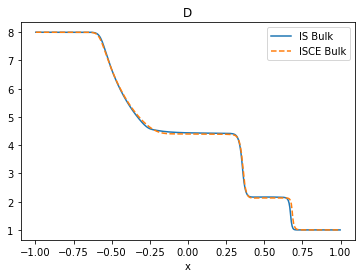

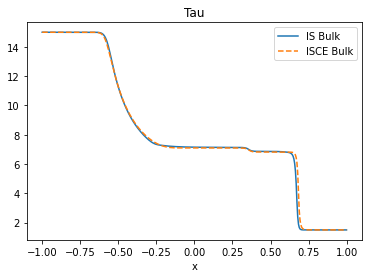

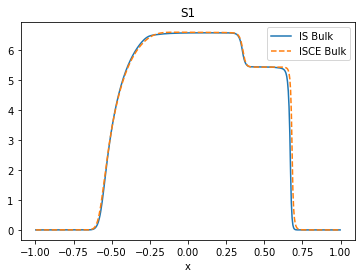

In [228]:
for quant in['D','Tau','S1']:
    plt.figure()
    for fs, name, ls in zip(fss, names, linestyles):
        plt.plot(fs[-1]['Domain/x'][:], fs[-1]['Conserved/'+quant][:],label=name,linestyle=ls)
    plt.title(quant)
    plt.xlabel('x')
    plt.legend()
#     plt.savefig("ConfirmationReportPlots/ConsIdeal_"+quant+".pdf")
#     plt.savefig("ConfirmationReportPlots/StillShock/ConsBulk_"+quant+".pdf")
    plt.show()


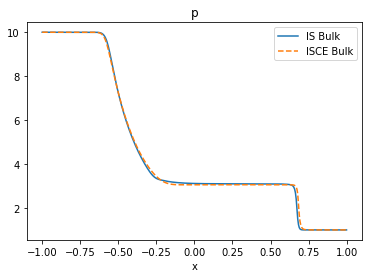

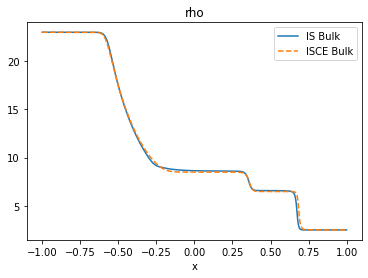

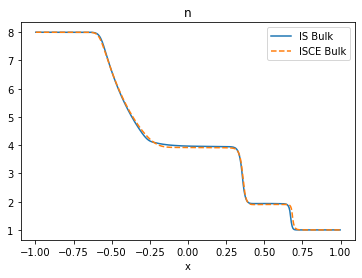

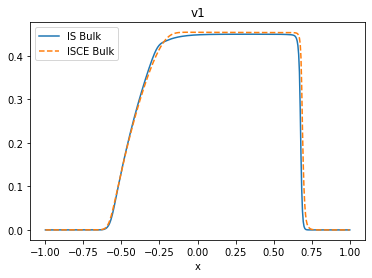

In [229]:
for quant in['p','rho','n','v1']:
    plt.figure()
    for fs, name, ls in zip(fss, names, linestyles):
        plt.plot(fs[-1]['Domain/x'][:], fs[-1]['Primitive/'+quant][:],label=name,linestyle=ls)
    plt.title(quant)
    plt.xlabel('x')
    plt.legend()
#     plt.savefig("ConfirmationReportPlots/PrimsIdeal_"+quant+".pdf")
#     plt.savefig("ConfirmationReportPlots/StillShock/PrimsBulk_"+quant+".pdf")
    plt.show()